In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torchvision.models import resnet50

from torchvision.transforms import transforms
from PIL import Image

In [2]:
#@title Load Model
model = resnet50()
model.fc = nn.Linear(model.fc.in_features, 44)
model.load_state_dict(torch.load("./best_model.pth"))
model.eval();

C:\Users\nickm\AppData\Local\Temp\ipykernel_39140\3070385129.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("./best_model.pth"))


In [17]:
#@title Prepare image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

img = Image.open("./test/Class (29)/R_315Class29 (4).jpg")
input_tensor = transform(img).unsqueeze(0)

In [ ]:
feature_maps = {}  # Dictionary to store feature maps by layer name

def hook(module, input, output, layer_name):
    feature_maps[layer_name] = output

# Register hooks for every layer in ResNet-50
layer_names = []  # Store layer names for reference
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):  # Register hook only on convolutional layers
        layer_names.append(name)
        # Register the hook while passing the layer name correctly via lambda
        module.register_forward_hook(lambda m, i, o, n=name: hook(m, i, o, n))
    
with torch.no_grad():
    model(input_tensor)


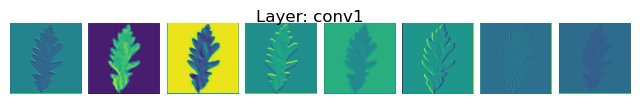

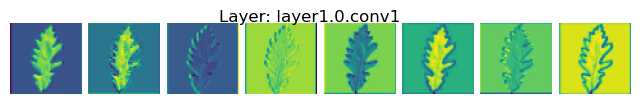

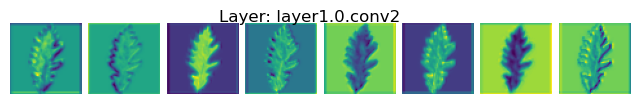

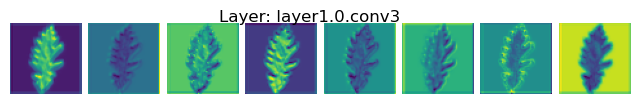

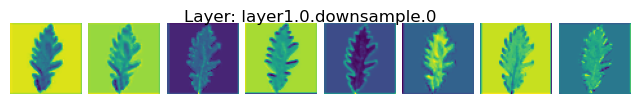

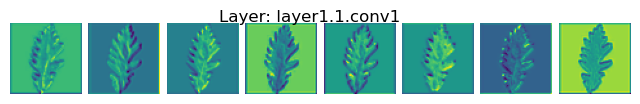

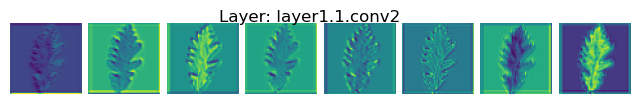

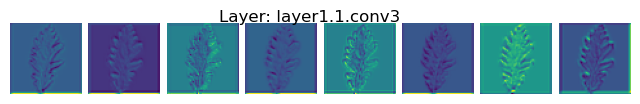

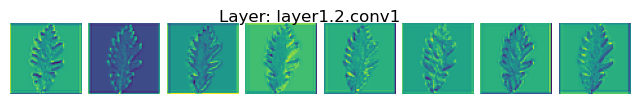

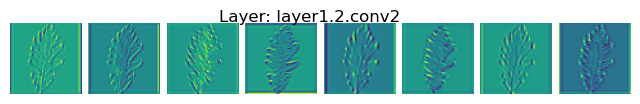

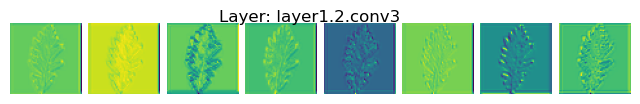

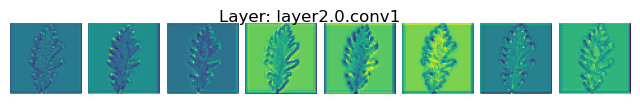

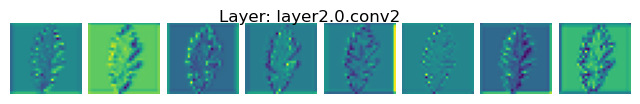

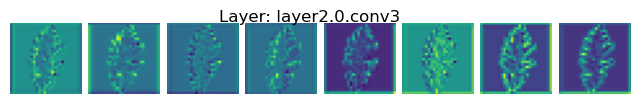

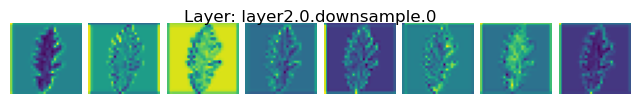

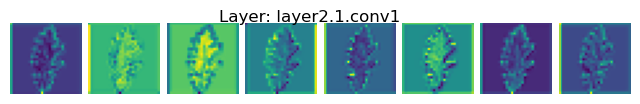

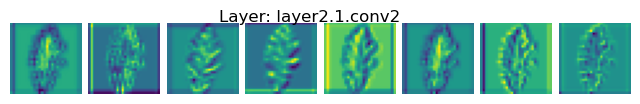

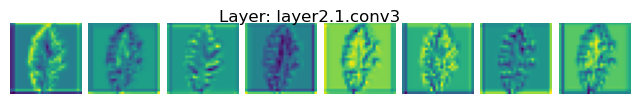

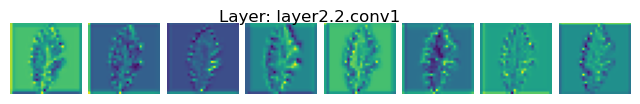

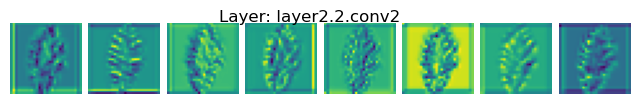

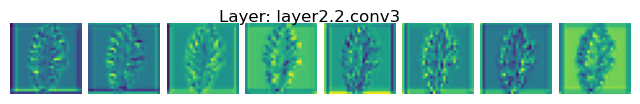

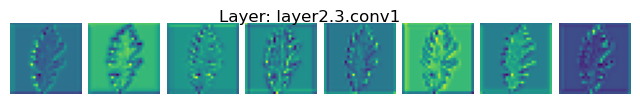

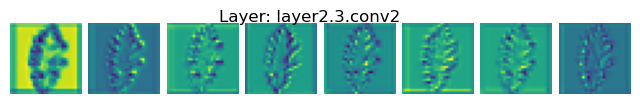

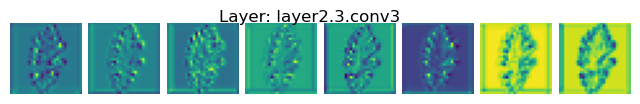

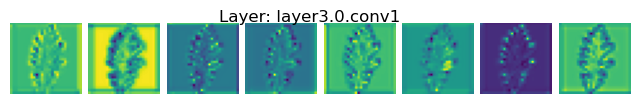

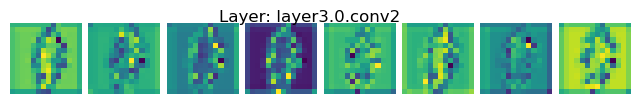

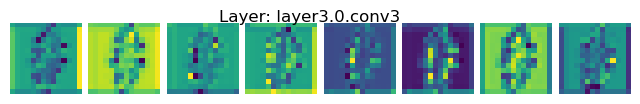

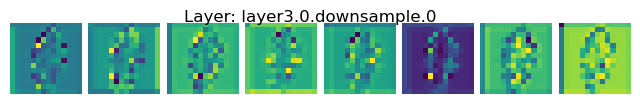

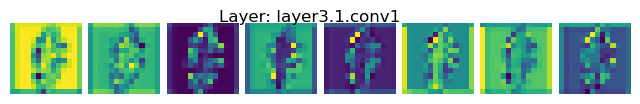

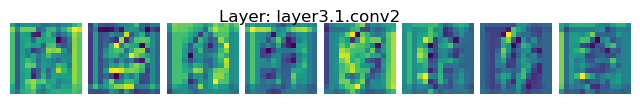

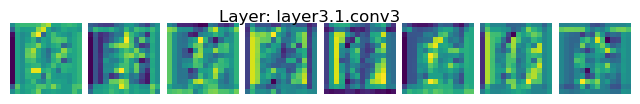

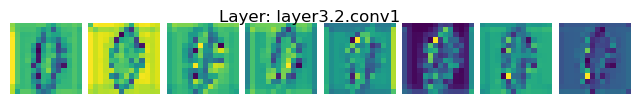

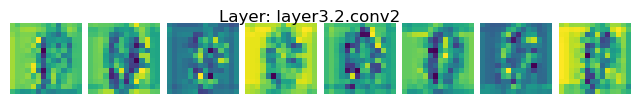

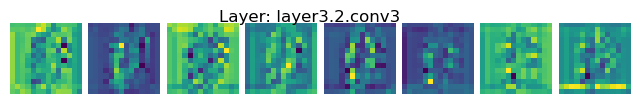

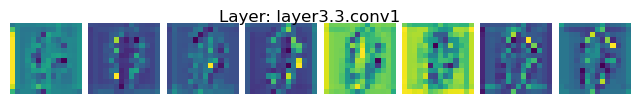

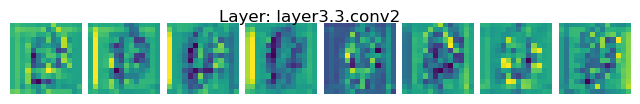

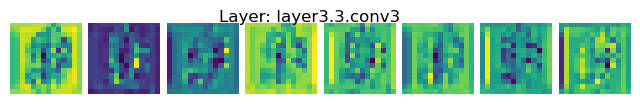

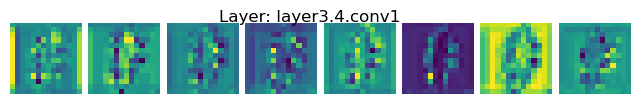

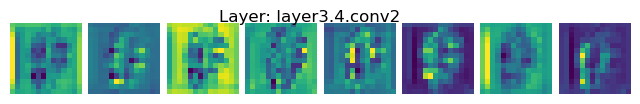

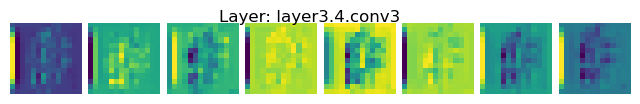

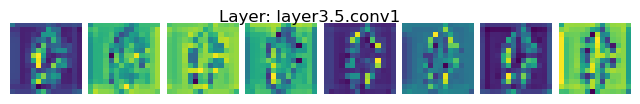

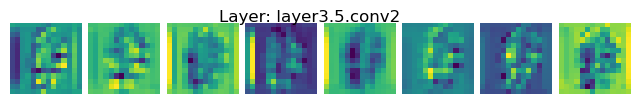

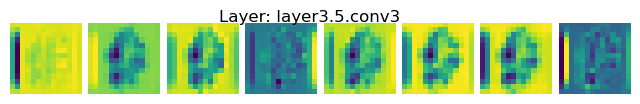

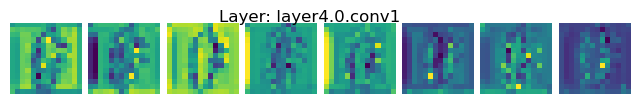

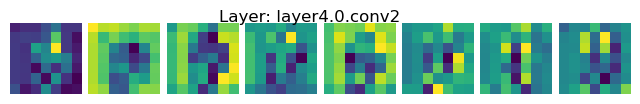

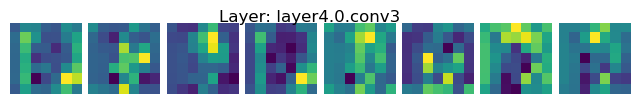

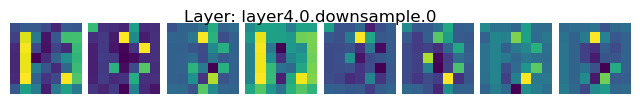

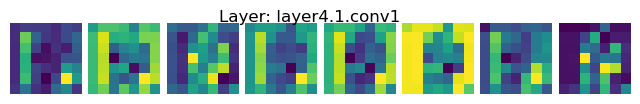

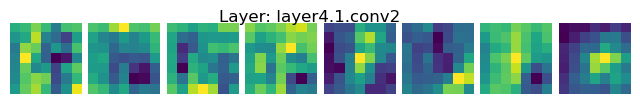

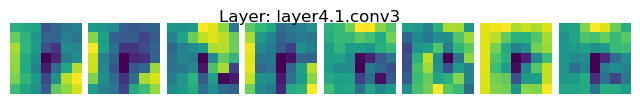

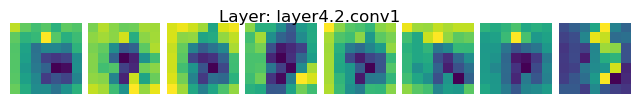

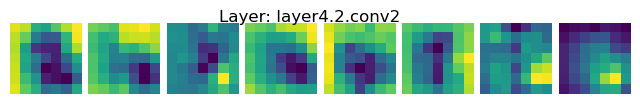

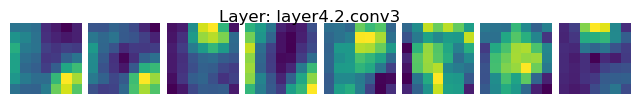

In [20]:
for layer_name in layer_names:
    if layer_name in feature_maps:  # Check if the layer has feature maps
        maps = feature_maps[layer_name][0]  # Get feature maps for the first image in the batch
        num_maps = maps.shape[0]

        # Create subplots for the first 8 feature maps
        fig, axs = plt.subplots(1, 8, figsize=(8, 1))  # 8 subplots in a row
        for i in range(8):  # Only the first 8 feature maps
            if i < num_maps:
                axs[i].imshow(maps[i].cpu().numpy(), cmap='viridis')
                axs[i].axis('off')
            else:
                axs[i].axis('off')  # Blank axis if fewer than 8 feature maps

        # Add a title for the layer
        fig.suptitle(f"Layer: {layer_name}", fontsize=12)
        plt.subplots_adjust(wspace=0.1)  # Reduce spacing between plots
        plt.show()